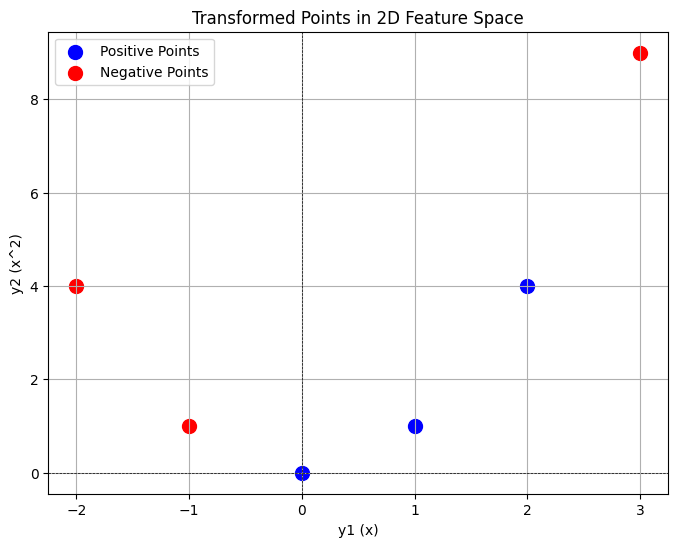

In [2]:
import matplotlib.pyplot as plt

# Original 1D data points
positive_points = [0, 1, 2]
negative_points = [-2, -1, 3]

# Apply the feature map: φ(x) = (x, x^2)
positive_transformed = [(x, x**2) for x in positive_points]
negative_transformed = [(x, x**2) for x in negative_points]

# Separate x and y coordinates for plotting
pos_x, pos_y = zip(*positive_transformed)
neg_x, neg_y = zip(*negative_transformed)

# Plot the transformed points
plt.figure(figsize=(8, 6))
plt.scatter(pos_x, pos_y, color='blue', label='Positive Points', s=100)
plt.scatter(neg_x, neg_y, color='red', label='Negative Points', s=100)

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Transformed Points in 2D Feature Space")
plt.xlabel("y1 (x)")
plt.ylabel("y2 (x^2)")
plt.legend()
plt.grid(True)
plt.show()

# CALCULATING OPTIMAL ALPHAS

In [1]:
import numpy as np
from cvxopt import matrix, solvers

# Labels for the data points
y = np.array([1, 1, 1, -1, -1, -1], dtype=float)

# Kernel matrix (dot products of points)
K = [[ 0,  0,  0,  0,  0,  0],
 [ 0,  2,  6,  2,  0, 12],
 [ 0,  6, 20, 12, 2, 42],
 [ 0, 2,   12,20 ,6 ,30],
 [0 ,0 ,2 ,6 ,2 ,6],
 [0 ,12 ,42 ,30 ,6 ,90]]

# Construct the matrix form for cvxopt
# The objective function: maximize sum(alpha) - 1/2 * alpha^T * (y_i * y_j * K)
# To solve using cvxopt, we define it as a quadratic programming problem:
P = np.outer(y, y) * K  # G = y_i * y_j * K
q = -np.ones(6)

# Equality constraint: sum(alpha_i * y_i) = 0
A_eq = y.reshape(1, -1)
b_eq = np.array([0.0])

# Inequality constraints: alpha_i >= 0 (no explicit matrix needed, handled by cvxopt default)

# Convert everything to cvxopt matrix format
P = matrix(P)
q = matrix(q)
A_eq = matrix(A_eq)
b_eq = matrix(b_eq)
G_ineq = matrix(-np.eye(6))  # alpha_i >= 0
h_ineq = matrix(np.zeros(6))

# Solve the quadratic programming problem
sol = solvers.qp(P, q, G_ineq, h_ineq, A_eq, b_eq)

# Output the result (the alphas)
alphas = np.ravel(sol['x'])
print("Optimal alphas:", alphas)


     pcost       dcost       gap    pres   dres
 0: -1.8004e+00 -4.0024e+00  2e+01  3e+00  2e+00
 1: -6.2167e-01 -3.0542e+00  3e+00  4e-02  2e-02
 2: -1.0798e+00 -1.3310e+00  3e-01  2e-16  1e-15
 3: -1.1106e+00 -1.1133e+00  3e-03  2e-16  5e-15
 4: -1.1111e+00 -1.1111e+00  3e-05  2e-16  2e-15
 5: -1.1111e+00 -1.1111e+00  3e-07  3e-16  2e-15
Optimal solution found.
Optimal alphas: [4.56394294e-01 2.85567450e-08 6.54716870e-01 1.00924677e-08
 8.39308304e-01 2.71802878e-01]


# DRAWING HYPERPLANE

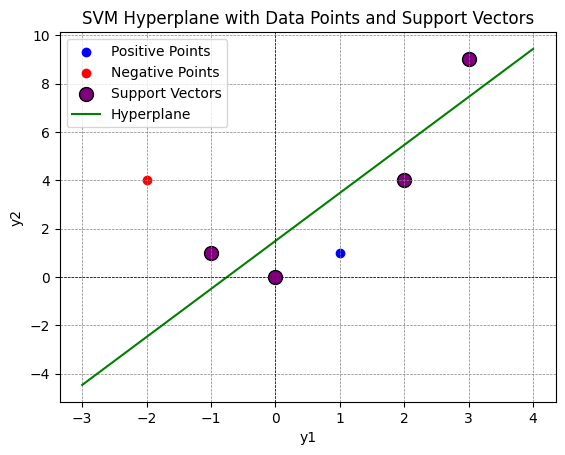

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Rounded weights and bias
w1 = 1.33
w2 = -0.67
b = 1.0

# Define the hyperplane equation: y2 = (-w1 * y1 - b) / w2
def hyperplane(y1):
    return (-w1 * y1 - b) / w2

# Data points
positive_points = np.array([[0, 0], [1, 1], [2, 4]])
negative_points = np.array([[-2, 4], [-1, 1], [3, 9]])

# Support vectors (from the alphas)
support_vectors = np.array([[0, 0], [2, 4], [-1, 1], [3, 9]])

# Generate y1 values for plotting the hyperplane
y1_values = np.linspace(-3, 4, 100)
y2_values = hyperplane(y1_values)

# Plot the data points
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', label='Positive Points')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='purple', label='Support Vectors', edgecolors='black', s=100, marker='o')

# Plot the hyperplane
plt.plot(y1_values, y2_values, color='green', label='Hyperplane')

# Add labels and legend
plt.xlabel('y1')
plt.ylabel('y2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('SVM Hyperplane with Data Points and Support Vectors')

# Show the plot
plt.show()